In [1]:
#Library
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandasql as sql

In [2]:
#data
data=pd.read_excel('/home/sd/Downloads/Delhi_Accident_Data.xlsx')

In [3]:
#short look
data.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,# INJURED,# KILLED,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1,NaN,NaN,NaN
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1,NaN,NaN,NaN
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN


In [4]:
# removing unnecessery columns
aatributes=["Unnamed: 7","Unnamed: 8","Unnamed: 9"]
data=data.drop(columns=aatributes)

In [15]:
# remove special characters and space in the column name
data.columns = data.columns.str.replace('[#]', '')
data.columns = data.columns.str.replace(' ', '')
data.head()

75748

## Total Number of Accident Through the year

In [6]:
Year_total_count=sql.sqldf("""select YEAR,COUNT(YEAR) as number_of_accident,sum(INJURED) as total_injured ,sum(KILLED) as total_death, sum((INJURED+KILLED)) as number_of_effected_people
                from data
                group by YEAR
                """)

Year_total_count


,YEAR,number_of_accident,total_injured,total_death,number_of_effected_people
0,2008,8435,7343,2093,9436
1,2009,7515,6935,2325,9260
2,2010,7259,7108,2152,9260
3,2011,7280,6975,2110,9085
4,2012,6937,6633,1866,8499
5,2013,7566,7098,1820,8918
6,2014,8623,8283,1671,9954
7,2015,8085,8258,1622,9880
8,2016,7375,7154,1591,8745
9,2017,6673,6604,1584,8188


## year_wise_vaiclefault

,VEHICLEATFAULT,count(VEHICLEATFAULT),percentage
0,PVT CAR,22043,29.100438
1,UNKNOWN,19145,25.274595
2,S/C&M/C,10990,14.508634
3,HTV/GDS,6029,7.959286
4,TEMPO,4369,5.767809
5,TSR,2006,2.648255
6,DTC BUS,1879,2.480594
7,BUS OTR,1241,1.638327
8,TAXI,1226,1.618525
9,DELIVERY VAN,1090,1.438982


/home/sd/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/sd/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


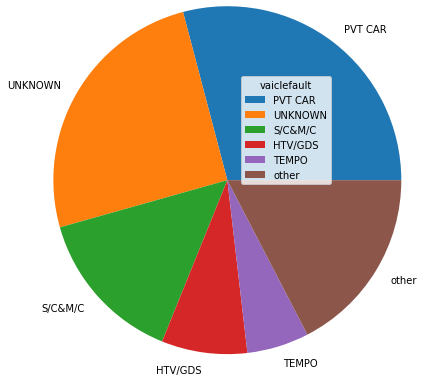

In [25]:
t=data.shape[0]
vaicle_fault=sql.sqldf("""select VEHICLEATFAULT,count(VEHICLEATFAULT),count(VEHICLEATFAULT)/757.48 as percentage
            from data
            group by VEHICLEATFAULT
            order by count(VEHICLEATFAULT) desc""")
display(vaicle_fault.head(10))

x1=vaicle_fault.head().VEHICLEATFAULT
y1=vaicle_fault.head().percentage
x1[5]='other'
y1[5]=100-(y1[0]+y1[1]+y1[2]+y1[3]+y1[4])
x1=x1[0:6]
y1=y1[0:6]

plt.pie(y1, labels = x1,radius=2)

plt.legend(title = """vaiclefault""")

plt.show()

In [7]:
year_wise_vaiclefault=sql.sqldf("""select distinct YEAR,VEHICLEATFAULT,count(VEHICLEATFAULT) from data group by YEAR,VEHICLEATFAULT order by count(VEHICLEATFAULT)
desc""")
year_wise_vaiclefault.head(20)

,YEAR,VEHICLEATFAULT,count(VEHICLEATFAULT)
0,2015,PVT CAR,2771
1,2014,PVT CAR,2712
2,2016,PVT CAR,2350
3,2013,PVT CAR,2338
4,2014,UNKNOWN,2205
5,2008,UNKNOWN,2142
6,2008,PVT CAR,2106
7,2011,PVT CAR,2054
8,2017,PVT CAR,2001
9,2009,UNKNOWN,1967


### Comment: Privet Car causes more accident also many time vaicle type is not reported. 

#  

# District wise data

In [8]:
r=sql.sqldf("""select distinct DISTRICT from data""")
import numpy as np
arr=np.array(r)
arr.reshape((13))

array(['NORTH WEST DELHI', 'NEW DELHI', 'EAST DELHI', 'SHAHDARA',
       'WEST DELHI', 'SOUTH WEST DELHI', 'NORTH DELHI(ROHINI)',
       'NORTH EAST DELHI', 'SOUTH EAST DELHI', 'CENTRAL DELHI',
       'SOUTH DELHI', 'UNK', 'OUTER'], dtype=object)

### district and yearly number of accident 

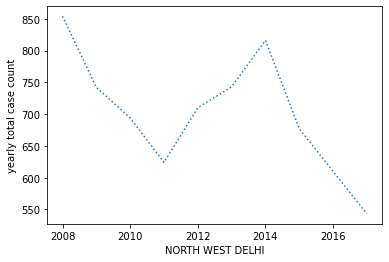

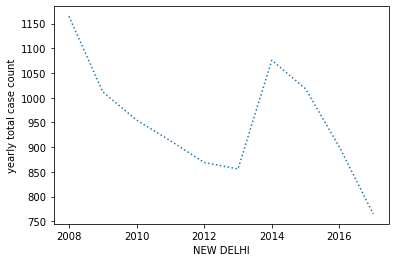

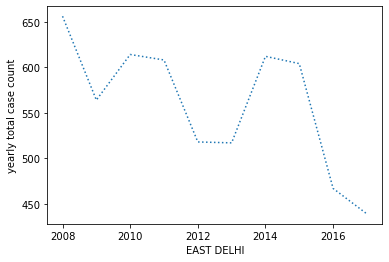

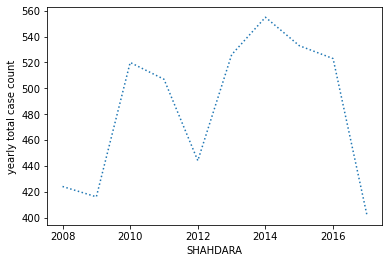

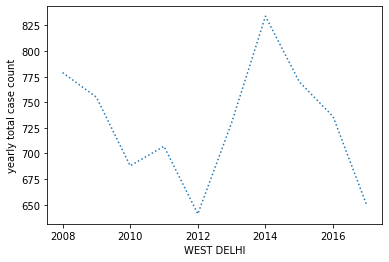

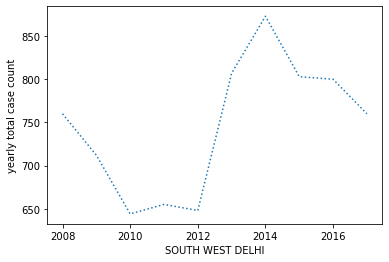

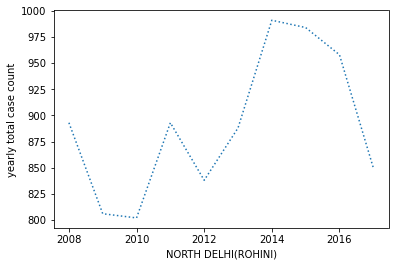

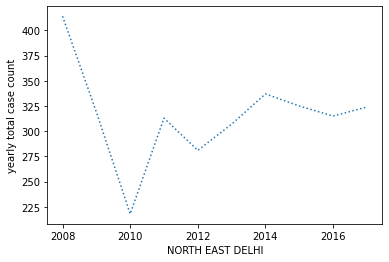

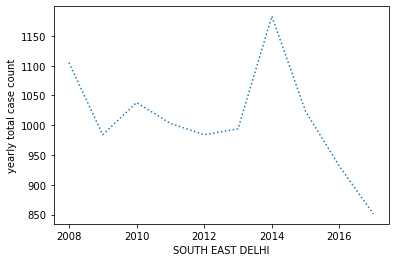

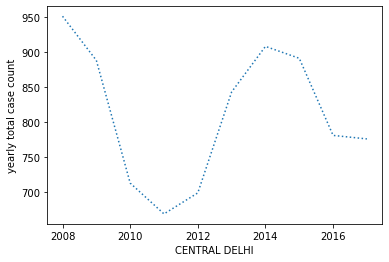

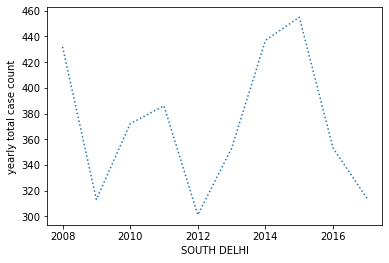

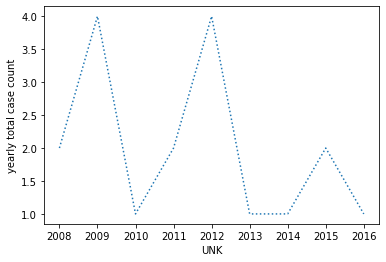

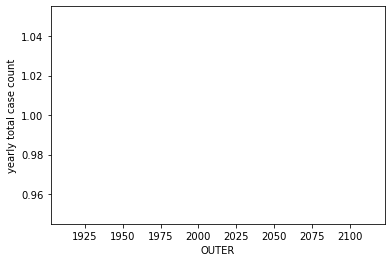

In [9]:
district_wise_table={}
for a in arr[:,0]:
    Y=sql.sqldf("""select *
                from data
                where DISTRICT=""" +"\""+a+"\""+";"
                )
    ##district wise data collection
    district_wise_table[a]=Y
    x=sql.sqldf("""select YEAR,COUNT(YEAR) as total_cases,sum(INJURED),sum(KILLED)
                FROM Y
                GROUP BY YEAR """)
    
    plt.xlabel(a,loc='center',)
    plt.ylabel("yearly total case count",loc='center',)
    plt.plot(x.YEAR,x.total_cases, linestyle = 'dotted')
    # district wise cases count plot over the year  
    plt.show()
    
    
    

## Year and District wise victim count

In [10]:
dist_yearly_victim_count={}
for a in arr[:,0]:
    for i in (8,17):
        year=2000+i
        dist_yearly_victim_count[a]={}
        r=district_wise_table[a]
        z=sql.sqldf("""select VICTIM,count(VICTIM) as count FROM r where YEAR= """ + "\""+str(year)+"\"" +""" group by VICTIM ORDER BY count desc; """)
        dist_yearly_victim_count[a][year]=z
    

,VICTIM,count,percentage
0,S/C & M/C,255,46
1,PEDESTRIAN,208,38
2,CAR,22,4
3,TSR,13,2
4,CYCLE,11,2


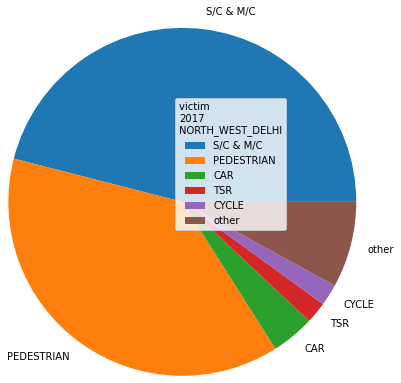

In [11]:
# for district NORTH WEST DELHI and year 2017 number of victim count and persentage

dist_yearly_victim_count_NORTH_WEST_DELHI_2017=dist_yearly_victim_count[ 'NORTH WEST DELHI'][2017]
sum_count=sql.sqldf("""select sum (count) as sum_count from dist_yearly_victim_count_NORTH_WEST_DELHI_2017 """)
dist_yearly_victim_percent_count_NORTH_WEST_DELHI_2017=sql.sqldf("""select VICTIM,count, count*100/543 as percentage 
                                                                    from dist_yearly_victim_count_NORTH_WEST_DELHI_2017
                                                                    """)
display(dist_yearly_victim_percent_count_NORTH_WEST_DELHI_2017.head(5))
y = np.array(dist_yearly_victim_percent_count_NORTH_WEST_DELHI_2017.percentage)

# pie chart 
y[5]=100-(y[0]+y[1]+y[2]+y[3]+y[4])
y=y[0:6]
x=np.array(dist_yearly_victim_percent_count_NORTH_WEST_DELHI_2017.VICTIM)
x[5]="other"
x=x[0:6]
plt.pie(y, labels = x,radius=2)

plt.legend(title = """victim 
2017
NORTH_WEST_DELHI""")

plt.show()



